<a href="https://colab.research.google.com/github/SimraRafiq/Deep_Learning-assignment/blob/main/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers




In [ ]:
ionosphere_data=pd.read_csv("ionosphere_data.csv")
display(ionosphere_data.head(n=20))

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,-0.47929,0.78225,-0.50764,0.74628,-0.61436,0.57945,-0.68086,0.37852,-0.73641,0.36324,-0.76562,0.31898,-0.79753,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,-0.43569,0.94510,-0.40668,0.90392,-0.46381,0.98305,-0.35257,0.84537,-0.66020,0.75346,-0.60589,0.69637,-0.64225,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [ ]:
ionosphere_data.shape


(351, 35)

In [ ]:
ionosphere_data.ndim


2

In [ ]:
ionosphere_data["feature1"]

0      1
1      1
2      1
3      1
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: feature1, Length: 351, dtype: int64

In [ ]:
ionosphere_data.iloc[23]

feature1     0
feature2     0
feature3    -1
feature4     1
feature5     0
feature6     0
feature7     0
feature8     0
feature9    -1
feature10    1
feature11    1
feature12    1
feature13    0
feature14    0
feature15    0
feature16    0
feature17    1
feature18   -1
feature19   -1
feature20    1
feature21    1
feature22    1
feature23    0
feature24    0
feature25   -1
feature26   -1
feature27    1
feature28   -1
feature29    1
feature30    1
feature31   -1
feature32    1
feature33    0
feature34    0
label        b
Name: 23, dtype: object

In [ ]:
ionosphere_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [ ]:
pd.isnull(ionosphere_data).sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
ionosphere_data.mean()

feature1     0.891738
feature2     0.000000
feature3     0.641342
feature4     0.044372
feature5     0.601068
feature6     0.115889
feature7     0.550095
feature8     0.119360
feature9     0.511848
feature10    0.181345
feature11    0.476183
feature12    0.155040
feature13    0.400801
feature14    0.093414
feature15    0.344159
feature16    0.071132
feature17    0.381949
feature18   -0.003617
feature19    0.359390
feature20   -0.024025
feature21    0.336695
feature22    0.008296
feature23    0.362475
feature24   -0.057406
feature25    0.396135
feature26   -0.071187
feature27    0.541641
feature28   -0.069538
feature29    0.378445
feature30   -0.027907
feature31    0.352514
feature32   -0.003794
feature33    0.349364
feature34    0.014480
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ionosphere_data["label"]=labelencoder.fit_transform(ionosphere_data["label"])


In [ ]:
ionosphere_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [ ]:
x=ionosphere_data.loc[0:,"feature1":"feature34"]
y=ionosphere_data.loc[0:,"label"]


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.40,random_state=69)

In [ ]:
train_data=np.asarray(train_data)
test_data=np.asarray(test_data)

In [ ]:
train_data[33]

array([ 1.     ,  0.     ,  1.     ,  0.09802,  1.     ,  0.25101,
        0.9839 ,  0.33044,  0.80365,  0.5302 ,  0.74977,  0.60297,
        0.56937,  0.71942,  0.55311,  0.74079,  0.29452,  0.82193,
        0.21137,  0.79777,  0.09709,  0.82162, -0.01734,  0.7987 ,
       -0.15144,  0.75596, -0.22839,  0.69187, -0.31713,  0.60948,
       -0.40291,  0.54522, -0.42815,  0.44534])

In [ ]:
train_labels=np.asarray(train_labels).astype("float32")
test_labels=np.asarray(test_labels).astype("float32")

In [ ]:
ionosphere_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(34,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,train_labels,epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.5975 - accuracy: 0.7084
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7298
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7480
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7743
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7620
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7998
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8374
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8359
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8214
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8504
Epoch 11/50
7/7 [======================

In [ ]:
test_loss,test_acc=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"test_accuracy:",test_acc)


5/5 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8865
test_loss: 0.24355190992355347 test_accuracy: 0.8865247964859009


In [ ]:
model.predict(test_data)[8]

array([0.98892426], dtype=float32)

In [ ]:
model.predict(test_data)[76]

array([0.84104276], dtype=float32)

In [ ]:
model.predict(test_data)[54]

array([0.00579131], dtype=float32)

In [ ]:
 history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy'])

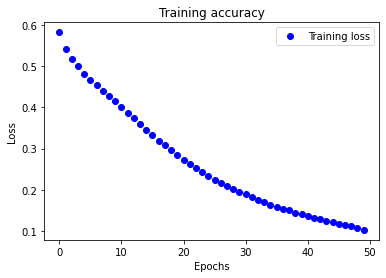

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
epochs = range(50)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

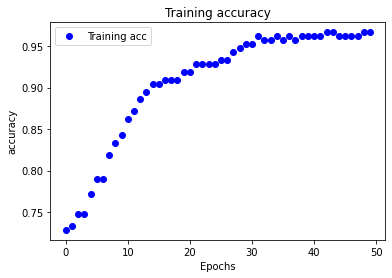

In [ ]:
acc_values = history_dict['accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') 
plt.legend()
plt.show()